In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
pip install wordcloud

     |████████████████████████████████| 371 kB 923 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [128]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("twitter_data.csv")

/home/arjun/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
from textblob import TextBlob

In [4]:
from IPython.display import display 

In [7]:
df.shape

(107968, 88)

In [5]:
df.columns

Index(['user_id', 'status_id', 'created_at', 'screen_name', 'text', 'source',
       'display_text_width', 'reply_to_status_id', 'reply_to_user_id',
       'reply_to_screen_name', 'is_quote', 'is_retweet', 'favorite_count',
       'retweet_count', 'hashtags', 'symbols', 'urls_url', 'urls_t.co',
       'urls_expanded_url', 'media_url', 'media_t.co', 'media_expanded_url',
       'media_type', 'ext_media_url', 'ext_media_t.co',
       'ext_media_expanded_url', 'ext_media_type', 'mentions_user_id',
       'mentions_screen_name', 'lang', 'quoted_status_id', 'quoted_text',
       'quoted_created_at', 'quoted_source', 'quoted_favorite_count',
       'quoted_retweet_count', 'quoted_user_id', 'quoted_screen_name',
       'quoted_name', 'quoted_followers_count', 'quoted_friends_count',
       'quoted_statuses_count', 'quoted_location', 'quoted_description',
       'quoted_verified', 'retweet_status_id', 'retweet_text',
       'retweet_created_at', 'retweet_source', 'retweet_favorite_count',
    

In [7]:
pd.set_option('display.max_columns', None)
df.head(2)

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favorite_count,retweet_count,hashtags,symbols,urls_url,urls_t.co,urls_expanded_url,media_url,media_t.co,media_expanded_url,media_type,ext_media_url,ext_media_t.co,ext_media_expanded_url,ext_media_type,mentions_user_id,mentions_screen_name,lang,quoted_status_id,quoted_text,quoted_created_at,quoted_source,quoted_favorite_count,quoted_retweet_count,quoted_user_id,quoted_screen_name,quoted_name,quoted_followers_count,quoted_friends_count,quoted_statuses_count,quoted_location,quoted_description,quoted_verified,retweet_status_id,retweet_text,retweet_created_at,retweet_source,retweet_favorite_count,retweet_retweet_count,retweet_user_id,retweet_screen_name,retweet_name,retweet_followers_count,retweet_friends_count,retweet_statuses_count,retweet_location,retweet_description,retweet_verified,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords,status_url,name,location,description,url,protected,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,x53414786,x1108007155251249152,2019-03-19 14:07:46,Actor_Siddharth,I've spoken out against every major political ...,Twitter Web App,279,NaN,NaN,NaN,False,False,10757,2828,CHOWKIDAR BJP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/Actor_Siddharth/status/110...,Siddharth,Dark side of the moon,Indian. Actor. Producer. Musician. Believer. I...,NaN,False,4115243,75,5388,13776,474,2009-07-03 15:33:34,True,NaN,NaN,en,NaN,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1095897454...
1,x21014078,x1108223274222116864,2019-03-20 04:26:33,svaradarajan,Bhakts are thrilled one of the four men arrest...,Twitter Web Client,276,NaN,NaN,NaN,True,False,4490,1681,NaN,NaN,twitter.com/ShefVaidya/sta…,https://t.co/Wb0LMfSURL,https://twitter.com/ShefVaidya/status/11082077...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x19929890,BDUTT,en,x1108207731024945152,"So @BDUTT, when are you going to inform the wo...",2019-03-20 03:24:47,Twitter for iPhone,4442.0,3046.0,x1934388686,ShefVaidya,Shefali Vaidya ஷெஃபாலி வைத்யா शेफाली वैद्य,325977.0,1659.0,71820.0,"Pune, Maharashtra","Author, Columnist, V-logger, Photographer, Sat...",True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/svaradarajan/status/110822...,Siddharth,"New Delhi, India",Founding Editor of The Wire.,https://t.co/yPVMOk3Vw3,False,486943,865,1327,42220,503,2009-02-16 19:02:23,True,https://t.co/yPVMOk3Vw3,http://thewire.in,en,https://pbs.twimg.com/profile_banners/21014078...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1100960124...


In [9]:
df['created_at'].min()

'2019-03-19 14:07:46'

In [10]:
df['created_at'].max()

'2019-03-20 22:06:56'

In [13]:
df['year'] = pd.DatetimeIndex(df['created_at']).year

In [17]:
df_copy = df.copy()

In [5]:
df.drop(['user_id', 'status_id', 'created_at', 'source','reply_to_status_id', 'reply_to_user_id',
       'reply_to_screen_name', 'is_quote', 'symbols', 'urls_url', 'urls_t.co',
       'urls_expanded_url', 'media_url', 'media_t.co', 'media_expanded_url',
       'media_type', 'ext_media_url', 'ext_media_t.co',
       'ext_media_expanded_url', 'ext_media_type', 'mentions_user_id',
       'mentions_screen_name','quoted_status_id', 'quoted_text',
       'quoted_created_at', 'quoted_source', 'quoted_favorite_count',
       'quoted_retweet_count', 'quoted_user_id', 'quoted_screen_name',
       'quoted_name', 'quoted_followers_count', 'quoted_friends_count',
       'quoted_statuses_count', 'quoted_location', 'quoted_description',
       'quoted_verified', 'retweet_status_id', 'retweet_text',
       'retweet_created_at', 'retweet_source', 'retweet_favorite_count',
       'retweet_retweet_count', 'retweet_user_id', 'retweet_screen_name',
       'retweet_name', 'retweet_followers_count', 'retweet_friends_count',
       'retweet_statuses_count', 'retweet_location', 'retweet_description',
       'retweet_verified', 'place_url', 'place_name', 'place_full_name',
       'place_type', 'country', 'country_code', 'geo_coords', 'coords_coords',
       'bbox_coords', 'status_url', 'name', 'location', 'description', 'url',
       'protected','listed_count',
       'statuses_count', 'favourites_count',
       'profile_url', 'profile_expanded_url',
       'profile_banner_url', 'profile_background_url', 'profile_image_url'],axis=1,inplace=True)

In [9]:
df.head()

,screen_name,text,display_text_width,is_retweet,favorite_count,retweet_count,hashtags,lang,followers_count,friends_count,account_created_at,verified,account_lang
0,Actor_Siddharth,I've spoken out against every major political ...,279,False,10757,2828,CHOWKIDAR BJP,en,4115243,75,2009-07-03 15:33:34,True,en
1,svaradarajan,Bhakts are thrilled one of the four men arrest...,276,False,4490,1681,NaN,en,486943,865,2009-02-16 19:02:23,True,en
2,BJP4India,You may now make #MainBhiChowkidar song as you...,268,False,7597,2864,MainBhiChowkidar,en,10742860,2,2010-10-26 02:19:07,True,en
3,commo_nic_ation,Breakfast with chief chowkidar in Australia. F...,111,True,0,1253,NaN,en,113,465,2017-06-17 23:41:49,False,en
4,PAWANSANAN,See how one of our #Chowkidar have thrashed Pa...,140,True,0,276,Chowkidar,en,523,1545,2010-07-09 21:55:28,False,en


In [20]:
df['verified'].value_counts()

False    107017
True        951
Name: verified, dtype: int64

In [23]:
from wordcloud import WordCloud

In [186]:
mean=np.mean(df['display_text_width'])
print(f"The mean length of the tweets:  {mean}")

The mean length of the tweets:  134.89383891523414


In [187]:
#lik_max=np.max(data['Likes'])
rt_max=np.max(dfch['retweet_count'])

#Extract the index of max
#fav=data[data.Likes==lik_max].index[0]
rt=df[df.retweet_count==rt_max].index[0]

#Print the result
#print(f"The most liked tweet is: {data['Tweets'][fav]}")
#print(f"Number of likes: {lik_max}")
#print("------------------")
#print()

#Print the most retweeted tweet
print(f"The most liked tweet is: {dfch['Tweets_Cln'][rt]}")
print(f"Number of retweets: {rt_max}")
print("------------------")
print()


The most liked tweet is: Your Chowkidar is standing firm ; serving the nation.

But, I am not alone.

Everyone who is fighting corruption, dirt, social evils is a Chowkidar.

Everyone working hard for the progress of India is a Chowkidar.

Today, every Indian is saying-#MainBhiChowkidar
Number of retweets: 56030
------------------



<AxesSubplot:xlabel='year'>

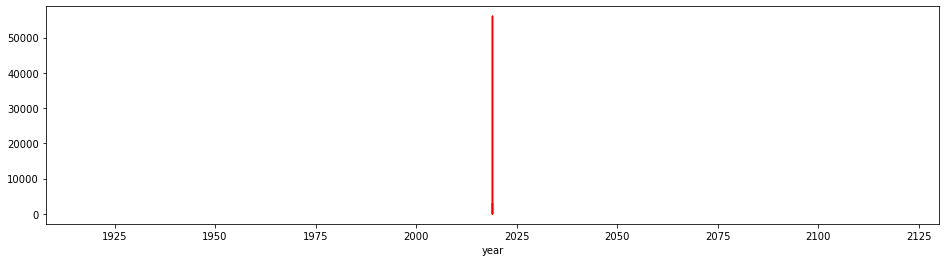

In [82]:
retweet=pd.Series(data=df['retweet_count'].values,index=df['year'])
retweet.plot(figsize=(16,4), color='r')

In [83]:
df_copy.drop(['user_id', 'status_id', 'source','reply_to_status_id', 'reply_to_user_id',
       'reply_to_screen_name', 'is_quote', 'symbols', 'urls_url', 'urls_t.co',
       'urls_expanded_url', 'media_url', 'media_t.co', 'media_expanded_url',
       'media_type', 'ext_media_url', 'ext_media_t.co',
       'ext_media_expanded_url', 'ext_media_type', 'mentions_user_id',
       'mentions_screen_name','quoted_status_id', 'quoted_text',
       'quoted_created_at', 'quoted_source', 'quoted_favorite_count',
       'quoted_retweet_count', 'quoted_user_id', 'quoted_screen_name',
       'quoted_name', 'quoted_followers_count', 'quoted_friends_count',
       'quoted_statuses_count', 'quoted_location', 'quoted_description',
       'quoted_verified', 'retweet_status_id', 'retweet_text',
       'retweet_created_at', 'retweet_source', 'retweet_favorite_count',
       'retweet_retweet_count', 'retweet_user_id', 'retweet_screen_name',
       'retweet_name', 'retweet_followers_count', 'retweet_friends_count',
       'retweet_statuses_count', 'retweet_location', 'retweet_description',
       'retweet_verified', 'place_url', 'place_name', 'place_full_name',
       'place_type', 'country', 'country_code', 'geo_coords', 'coords_coords',
       'bbox_coords', 'status_url', 'name', 'location', 'description', 'url',
       'protected','listed_count',
       'statuses_count', 'favourites_count',
       'profile_url', 'profile_expanded_url',
       'profile_banner_url', 'profile_background_url', 'profile_image_url'],axis=1,inplace=True)

In [84]:
df_copy.head(2)

,created_at,screen_name,text,display_text_width,is_retweet,favorite_count,retweet_count,hashtags,lang,followers_count,friends_count,account_created_at,verified,account_lang,year
0,2019-03-19 14:07:46,Actor_Siddharth,I've spoken out against every major political ...,279,False,10757,2828,CHOWKIDAR BJP,en,4115243,75,2009-07-03 15:33:34,True,en,2019
1,2019-03-20 04:26:33,svaradarajan,Bhakts are thrilled one of the four men arrest...,276,False,4490,1681,NaN,en,486943,865,2009-02-16 19:02:23,True,en,2019


In [86]:
df_copy['month'] = pd.DatetimeIndex(df_copy['created_at']).month

In [87]:
df_copy['day'] = pd.DatetimeIndex(df_copy['created_at']).day

<AxesSubplot:xlabel='day'>

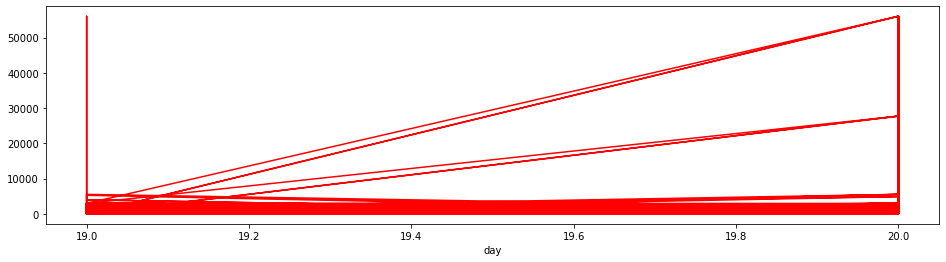

In [90]:
retweet=pd.Series(data=df_copy['retweet_count'].values,index=df_copy['day'])
retweet.plot(figsize=(16,4), color='r')

<AxesSubplot:>

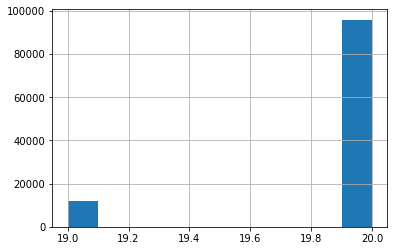

In [91]:
df_copy['day'].hist()

In [93]:
df.isnull().sum()

screen_name               0
text                      0
display_text_width        0
is_retweet                0
favorite_count            0
retweet_count             0
hashtags              59121
lang                      0
followers_count           0
friends_count             0
account_created_at        0
verified                  0
account_lang              0
year                      0
dtype: int64

In [6]:
df['Tweets_Cln']=df.text.str.replace(r'http\S+', '').str.replace(r'@\S+', '').str.replace('&amp', '').str.rstrip()

In [11]:
df['Tweets_Cln']

0         I've spoken out against every major political ...
1         Bhakts are thrilled one of the four men arrest...
2         You may now make #MainBhiChowkidar song as you...
3         Breakfast with chief chowkidar in Australia. F...
4         See how one of our #Chowkidar have thrashed Pa...
                                ...                        
107963       Sir, there was no Aryan invasion. It was a ...
107964    Your Chowkidar is standing firm ; serving the ...
107965    Kaun hai :\n\nJhooth ka Chowkidar ?\n\nFalse p...
107966    If you are a chowkidar then tell me \nwhere is...
107967    I am proud to join #MainBhiChowkidar movement....
Name: Tweets_Cln, Length: 107968, dtype: object

In [100]:
df['hashtags'].mode()

0    MainBhiChowkidar
dtype: object

In [140]:
import re
swachh_count = df.Tweets_Cln[df.Tweets_Cln.str.contains('Chowkidar', flags=re.IGNORECASE)].count() 
print(f"chowkidar comes {swachh_count} times.")
print("--------------------------------")
print()

chowkidar comes 105899 times.
--------------------------------



In [108]:
df.shape

(107968, 15)

# tweets that contains Chowkidar

In [115]:
dfch = df[df.Tweets_Cln.str.contains('Chowkidar', flags=re.IGNORECASE)]

In [141]:
dfch.isna().sum()

screen_name               0
text                      0
display_text_width        0
is_retweet                0
favorite_count            0
retweet_count             0
hashtags              57435
lang                      0
followers_count           0
friends_count             0
account_created_at        0
verified                  0
account_lang              0
year                      0
Tweets_Cln                0
sentiment                 0
dtype: int64

In [154]:
dfch.hashtags.value_counts()

MainBhiChowkidar                                                                      16991
NiravModi                                                                              5530
Chowkidar                                                                              2316
Lootidar NiravModi Chowkidar                                                           1261
NiravModi NiravModi                                                                    1043
                                                                                      ...  
ChowkidarPhirSe ChowkidarNarendraModi Chowkidar                                           1
sms WeWantChowkidar                                                                       1
NaMoAgain2019 NaMoAgain 2019Elections Hindus tamilhindus MainBhiChowkidar hinduism        1
reservation SaveTheUnreserved                                                             1
MainBhiChowkidar IssbaarbhiModiSarkar                                           

In [117]:
dfch.shape

(105899, 15)

In [208]:
dfch.head()

,screen_name,text,display_text_width,is_retweet,favorite_count,retweet_count,hashtags,lang,followers_count,friends_count,account_created_at,verified,account_lang,year,Tweets_Cln,sentiment
0,Actor_Siddharth,I've spoken out against every major political ...,279,False,10757,2828,CHOWKIDAR BJP,en,4115243,75,2009-07-03 15:33:34,True,en,2019,I've spoken out against every major political ...,-1
1,svaradarajan,Bhakts are thrilled one of the four men arrest...,276,False,4490,1681,NaN,en,486943,865,2009-02-16 19:02:23,True,en,2019,Bhakts are thrilled one of the four men arrest...,-1
2,BJP4India,You may now make #MainBhiChowkidar song as you...,268,False,7597,2864,MainBhiChowkidar,en,10742860,2,2010-10-26 02:19:07,True,en,2019,You may now make #MainBhiChowkidar song as you...,0
3,commo_nic_ation,Breakfast with chief chowkidar in Australia. F...,111,True,0,1253,NaN,en,113,465,2017-06-17 23:41:49,False,en,2019,Breakfast with chief chowkidar in Australia. F...,0
4,PAWANSANAN,See how one of our #Chowkidar have thrashed Pa...,140,True,0,276,Chowkidar,en,523,1545,2010-07-09 21:55:28,False,en,2019,See how one of our #Chowkidar have thrashed Pa...,0


# Tweet with most favorite counts

In [191]:
max_fav = np.max(dfch['favorite_count'])
max_fav

11827

In [206]:
fav=dfch[dfch.favorite_count==max_fav].index[0]
{dfch['Tweets_Cln'][fav]}
print(f"{dfch['Tweets_Cln'][fav]}")

#NiravModi arrested in London but Chowkidar  chor hai aur  jo Nirav Modi ke saath cocktail pe rahe the paak saaf hai? Will Rahul accept my challenge ; deny he did not meet Nirav Modi when loans were being given to Mama Bhanja?


In [250]:
follow_max = np.max(dfch['followers_count'])
followers = dfch[dfch['followers_count']==follow_max].index[0]
print(f"Screen Name : {dfch['screen_name'][followers]}")
print(f"No of followers : {follow_max}")

Screen Name : timesofindia
No of followers : 11702921


In [220]:
dfch[dfch['screen_name']=='timesofindia']

,screen_name,text,display_text_width,is_retweet,favorite_count,retweet_count,hashtags,lang,followers_count,friends_count,account_created_at,verified,account_lang,year,Tweets_Cln,sentiment
44105,timesofindia,PM @narendramodi to chowkidars: You must have ...,240,False,82,10,MainBhiChowkidar,en,11702921,511,2010-04-19 10:50:15,True,en,2019,PM to chowkidars: You must have noticed that ...,1
60278,timesofindia,"If you want your child to become 'chowkidar', ...",126,False,314,67,LokSabhaElections2019,en,11702910,511,2010-04-19 10:50:15,True,en,2019,"If you want your child to become 'chowkidar', ...",0
78550,timesofindia,PM’s ‘chowkidar’ campaign meant to hide failur...,82,False,68,14,NaN,en,11702917,511,2010-04-19 10:50:15,True,en,2019,PM’s ‘chowkidar’ campaign meant to hide failur...,0


# Word Cloud

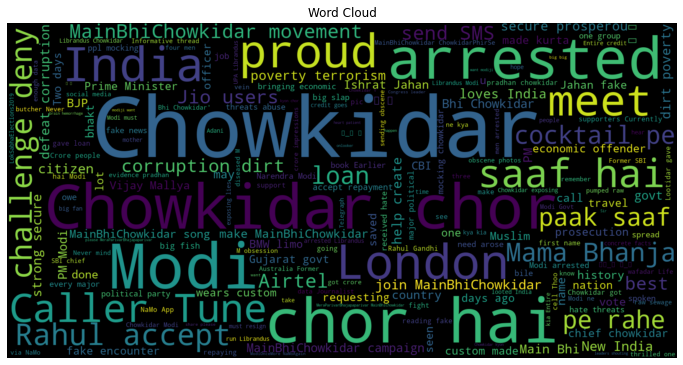

In [126]:
all_tweets = dfch['Tweets_Cln']
all_string =[]
for t in all_tweets:
    all_string.append(t)
all_string = pd.Series(all_string).str.cat(sep=' ')

stopwords = set(STOPWORDS)
stopwords.add("will")
stopwords.update(["say","said", "let", "now", "go", "Ji", "many", "Dear","phone","Dial","given","Idea","type", "Shri", "watch","mobile","ke","aur","jo","Airter","Vodafone","saath","NiravModi","Nirav"])

wordcloud = WordCloud(width=1600, height=800,max_font_size=200,stopwords=stopwords).generate(all_string)
plt.figure(figsize=(12,10))
plt.title('Word Cloud')
#matplotlib.pyplot.title(label, fontdict=None, loc='center', pad=None, **kwargs)[source]
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<ipython-input-134-60842846f215>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfch['sentiment'] = np.array([ analize_sentiment(tweet) for tweet in dfch['Tweets_Cln']])


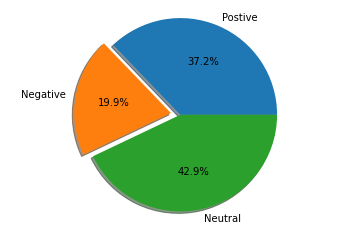

In [134]:
def analize_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
dfch['sentiment'] = np.array([ analize_sentiment(tweet) for tweet in dfch['Tweets_Cln']])
#display(data.head(2))

positive=dfch.loc[dfch.sentiment==1,'Tweets_Cln'].count()
negative=dfch.loc[dfch.sentiment==-1,'Tweets_Cln'].count()
neutral=dfch.loc[dfch.sentiment==0,'Tweets_Cln'].count()

#Let's plot
labels='Postive', 'Negative', 'Neutral'
sizes=[positive, negative, neutral]
explode=(0, 0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal') 
plt.show()

In [156]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [158]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/arjun/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [256]:
#Let's get word frequency 
import nltk
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
stop_words.update(["I", "The","के", "की","को","में", "का", "और","है।", "से","in", "a", "ji", "पर", "shri","है", "लिए", "ji.",
                   "ने", "also", "towards","mobile",";","•","dial","phone","big","phone.","one"])

counts = {}
for text in dfch.Tweets_Cln:
        for word in text.split():
            if word.lower() in stop_words:
                continue
            else:
                counts[word.lower()]=counts.get(word.lower(),0)+1

lst=[]

for key,val in counts.items():
    newtup=(val, key)
    lst.append(newtup)

lst=sorted(lst, reverse=True)

count_num=[]
value=[]
for val, key in lst[:10]:
    count_num.append(key)
    value.append(val)
    print(key, val)
 
print("-------------------------------")
print()
#   print(f"Number of times  mentioned #: {counts['#']}")

chowkidar 51448
#mainbhichowkidar 32695
modi 26581
nirav 14203
chor 12120
india 10757
arrested 10540
pm 10479
#chowkidar 9805
govt 8848
-------------------------------

Number of times  mentioned #: 154


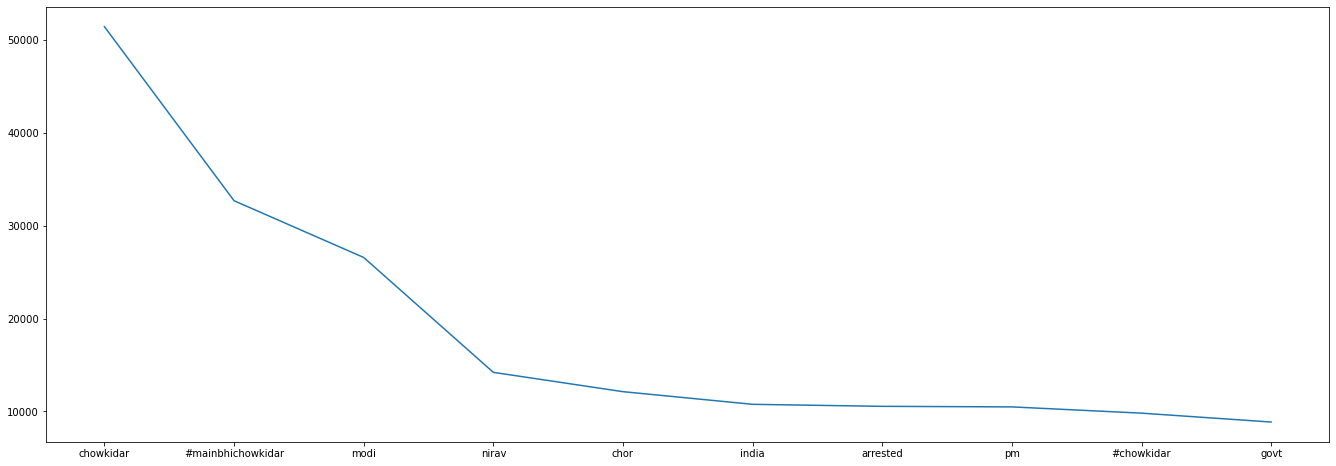

In [185]:
len(count_num)
plt.figure(figsize=[23,8])
plt.plot(count_num, value)

In [264]:
dfch.drop(['Indexes'],axis=1,inplace=True)

/home/arjun/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [265]:
dfch.head()

,screen_name,text,display_text_width,is_retweet,favorite_count,retweet_count,hashtags,lang,followers_count,friends_count,account_created_at,verified,account_lang,year,Tweets_Cln,sentiment
0,Actor_Siddharth,I've spoken out against every major political ...,279,False,10757,2828,CHOWKIDAR BJP,en,4115243,75,2009-07-03 15:33:34,True,en,2019,I've spoken out against every major political ...,-1
1,svaradarajan,Bhakts are thrilled one of the four men arrest...,276,False,4490,1681,NaN,en,486943,865,2009-02-16 19:02:23,True,en,2019,Bhakts are thrilled one of the four men arrest...,-1
2,BJP4India,You may now make #MainBhiChowkidar song as you...,268,False,7597,2864,MainBhiChowkidar,en,10742860,2,2010-10-26 02:19:07,True,en,2019,You may now make #MainBhiChowkidar song as you...,0
3,commo_nic_ation,Breakfast with chief chowkidar in Australia. F...,111,True,0,1253,NaN,en,113,465,2017-06-17 23:41:49,False,en,2019,Breakfast with chief chowkidar in Australia. F...,0
4,PAWANSANAN,See how one of our #Chowkidar have thrashed Pa...,140,True,0,276,Chowkidar,en,523,1545,2010-07-09 21:55:28,False,en,2019,See how one of our #Chowkidar have thrashed Pa...,0


In [12]:
df.head()

,screen_name,text,display_text_width,is_retweet,favorite_count,retweet_count,hashtags,lang,followers_count,friends_count,account_created_at,verified,account_lang,Tweets_Cln
0,Actor_Siddharth,I've spoken out against every major political ...,279,False,10757,2828,CHOWKIDAR BJP,en,4115243,75,2009-07-03 15:33:34,True,en,I've spoken out against every major political ...
1,svaradarajan,Bhakts are thrilled one of the four men arrest...,276,False,4490,1681,NaN,en,486943,865,2009-02-16 19:02:23,True,en,Bhakts are thrilled one of the four men arrest...
2,BJP4India,You may now make #MainBhiChowkidar song as you...,268,False,7597,2864,MainBhiChowkidar,en,10742860,2,2010-10-26 02:19:07,True,en,You may now make #MainBhiChowkidar song as you...
3,commo_nic_ation,Breakfast with chief chowkidar in Australia. F...,111,True,0,1253,NaN,en,113,465,2017-06-17 23:41:49,False,en,Breakfast with chief chowkidar in Australia. F...
4,PAWANSANAN,See how one of our #Chowkidar have thrashed Pa...,140,True,0,276,Chowkidar,en,523,1545,2010-07-09 21:55:28,False,en,See how one of our #Chowkidar have thrashed Pa...


In [7]:
def analize_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
df['sentiment'] = np.array([ analize_sentiment(tweet) for tweet in df['Tweets_Cln']])

In [8]:
df.head(2)

,screen_name,text,display_text_width,is_retweet,favorite_count,retweet_count,hashtags,lang,followers_count,friends_count,account_created_at,verified,account_lang,Tweets_Cln,sentiment
0,Actor_Siddharth,I've spoken out against every major political ...,279,False,10757,2828,CHOWKIDAR BJP,en,4115243,75,2009-07-03 15:33:34,True,en,I've spoken out against every major political ...,-1
1,svaradarajan,Bhakts are thrilled one of the four men arrest...,276,False,4490,1681,NaN,en,486943,865,2009-02-16 19:02:23,True,en,Bhakts are thrilled one of the four men arrest...,-1


# Splittng, vectorization and modeling

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')  # bow bag of words
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['Tweets_Cln'])

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

X=bow.toarray()
Y=df['sentiment']

In [11]:
xtrain_bow,xtest_bow,ytrain_bow,ytest_bow = train_test_split(X,Y, random_state=42, test_size=0.3)

In [12]:
rf= RandomForestClassifier()

In [13]:
rf.fit(xtrain_bow, ytrain_bow) # training the model

RandomForestClassifier()

In [14]:
ypred_bow=rf.predict(xtest_bow)

In [15]:
print(classification_report(ytest_bow,ypred_bow))

              precision    recall  f1-score   support

          -1       0.98      0.90      0.93      6426
           0       0.93      0.97      0.95     13877
           1       0.95      0.93      0.94     12088

    accuracy                           0.94     32391
   macro avg       0.95      0.93      0.94     32391
weighted avg       0.94      0.94      0.94     32391

